# library imports 

In [29]:
!pip install matplotlib
!pip install seaborn lifelines


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# Load the dataset
!pip install openpyxl

data = pd.read_excel('../Data/RADCURE_Clinical_v04_20241219.xlsx')
# check dataset
print("Dataset shape:", data.shape)
data.head()

# Basic info about columns
data.info()

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Quick summary statistics for numerical columns
data.describe()



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Dataset shape: (3346, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3346 entries, 0 to 3345
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   patient_id         3346 non-null   object        
 1   Age                3346 non-null   float64       
 2   Sex                3346 non-null   object        
 3   ECOG PS            3345 non-null   object        
 4   Smoking PY         3341 non-null   object        
 5   Smoking Status     3346 non-null   object        
 6   Ds Site            3346 non-null   object        
 7   Subsite            2972 non-null   object        
 8   T                  3334 non-null   object        
 9   N                  3333 non-null   object        
 10  M                  3332 non-null   object        
 11  Stage              3319 non-null   object        
 12  Path               3346 non-null   object        
 13  HPV                1717 non-null   ob

,Age,RT Start,Dose,Fx,Last FU,Length FU,Date of Death,Date Local,Date Regional,Date Distant,Date 2nd Ca,ContrastEnhanced
count,3346.000000,3346,3346.000000,3346.000000,3346,3346.000000,1058,380,189,413,439,3346.000000
mean,62.300418,2005-05-11 00:38:43.968918016,66.658240,33.024806,2009-05-09 01:23:03.622235648,4.136047,2006-06-11 08:31:45.482041600,2006-01-25 13:34:44.210526336,2006-01-08 02:55:14.285714304,2006-08-04 02:05:31.234866944,2006-06-29 06:27:03.690205056,0.601614
min,15.600000,1999-02-07 00:00:00,50.000000,20.000000,1999-06-22 00:00:00,0.156164,1999-06-22 00:00:00,1999-05-18 00:00:00,1999-05-18 00:00:00,1999-08-30 00:00:00,1999-05-26 00:00:00,0.000000
25%,54.500000,2002-07-23 06:00:00,64.000000,35.000000,2007-06-25 00:00:00,1.879452,2004-02-14 12:00:00,2003-01-28 06:00:00,2003-01-21 00:00:00,2004-01-12 00:00:00,2003-12-07 00:00:00,0.000000
50%,62.100000,2005-06-18 00:00:00,70.000000,35.000000,2010-06-22 00:00:00,3.663014,2006-09-14 12:00:00,2006-01-05 12:00:00,2006-05-10 00:00:00,2006-07-02 00:00:00,2006-09-11 00:00:00,1.000000
75%,70.300000,2008-04-19 18:00:00,70.000000,35.000000,2011-12-04 18:00:00,5.791781,2008-10-28 00:00:00,2009-01-02 12:00:00,2009-01-03 00:00:00,2009-08-05 00:00:00,2009-04-09 00:00:00,1.000000
max,90.000000,2011-03-21 00:00:00,74.000000,60.000000,2012-06-30 00:00:00,12.909589,2012-04-07 00:00:00,2012-04-30 00:00:00,2012-04-02 00:00:00,2012-06-19 00:00:00,2012-06-13 00:00:00,1.000000
std,11.645892,NaN,5.754948,5.206841,NaN,2.734757,NaN,NaN,NaN,NaN,NaN,0.489639


In [32]:
# Check how "Status" is coded
data['Status'].value_counts()

# Create binary event column: 1 = Dead (event), 0 = Alive (censored)
data['event'] = data['Status'].map({'Dead': 1, 'Alive': 0})

# Quick check
data['event'].value_counts()



event
0    2288
1    1058
Name: count, dtype: int64

A. Kaplan-Meier Survival Curves by Tumor Stage + Log-rank test


===== Kaplan-Meier Survival Curves by Tumor Stage =====


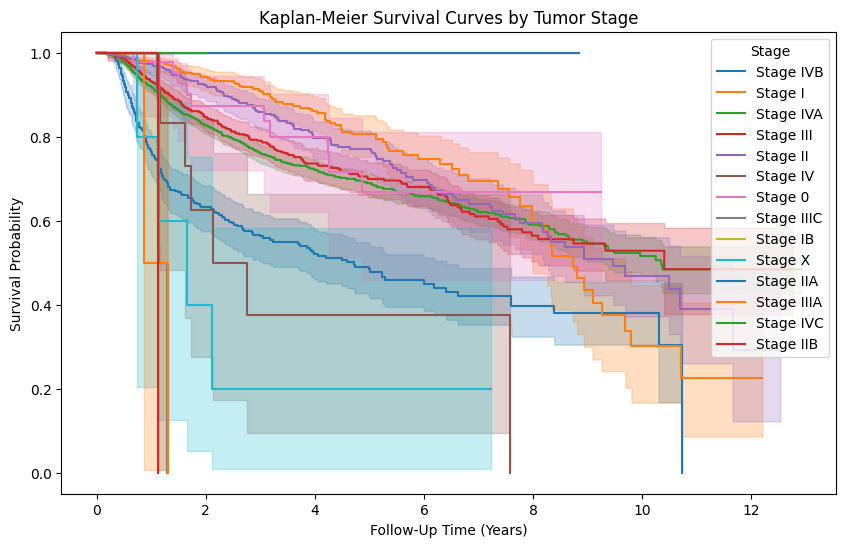


Log-rank test across all Stages:
<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 13
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         157.87 <0.005     87.28

===== Kaplan-Meier Survival Curves by Treatment Modality =====


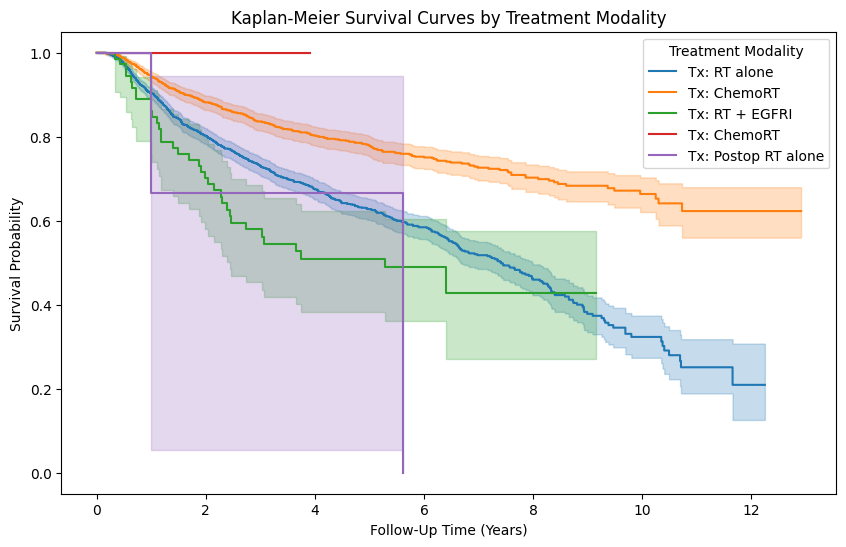


Log-rank test across all Treatment Modalities:
<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 4
         test_name = multivariate_logrank_test

---
 test_statistic      p  -log2(p)
         130.16 <0.005     87.85


In [33]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
import matplotlib.pyplot as plt

# ---------------------------
# Kaplan-Meier Survival Curves by Tumor Stage + Log-rank Test
# ---------------------------
print("\n===== Kaplan-Meier Survival Curves by Tumor Stage =====")

# Drop missing Stage values
stage_data = data.dropna(subset=['Stage'])
kmf = KaplanMeierFitter()

# Plotting KM curves by Stage
plt.figure(figsize=(10, 6))
for stage in stage_data['Stage'].unique():
    mask = stage_data['Stage'] == stage
    kmf.fit(stage_data.loc[mask, 'Length FU'], event_observed=stage_data.loc[mask, 'event'], label=f"Stage {stage}")
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier Survival Curves by Tumor Stage')
plt.xlabel('Follow-Up Time (Years)')
plt.ylabel('Survival Probability')
plt.legend(title='Stage')
plt.show()

# Multigroup log-rank test (all stages)
logrank_results_stage = multivariate_logrank_test(
    stage_data['Length FU'], 
    stage_data['Stage'], 
    event_observed=stage_data['event']
)
print("\nLog-rank test across all Stages:")
print(logrank_results_stage)

# ---------------------------
# Kaplan-Meier Survival Curves by Treatment Modality + Log-rank Test
# ---------------------------
print("\n===== Kaplan-Meier Survival Curves by Treatment Modality =====")

# Drop missing Tx Modality values
tx_data = data.dropna(subset=['Tx Modality'])
kmf = KaplanMeierFitter()

# Plotting KM curves by Tx Modality
plt.figure(figsize=(10, 6))
for tx in tx_data['Tx Modality'].unique():
    mask = tx_data['Tx Modality'] == tx
    kmf.fit(tx_data.loc[mask, 'Length FU'], event_observed=tx_data.loc[mask, 'event'], label=f"Tx: {tx}")
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier Survival Curves by Treatment Modality')
plt.xlabel('Follow-Up Time (Years)')
plt.ylabel('Survival Probability')
plt.legend(title='Treatment Modality')
plt.show()

# Multigroup log-rank test (all Tx modalities)
logrank_results_tx = multivariate_logrank_test(
    tx_data['Length FU'], 
    tx_data['Tx Modality'], 
    event_observed=tx_data['event']
)
print("\nLog-rank test across all Treatment Modalities:")
print(logrank_results_tx)


In [34]:
from lifelines import CoxPHFitter

# Prepare the dataset

# 1. Encode 'Status' as event (Dead=1, Alive=0)
data['event'] = data['Status'].map({'Dead': 1, 'Alive': 0})

# 2. Select relevant columns
df_cox = data[['Length FU', 'event', 'Age', 'Stage', 'Tx Modality']].dropna()

# 3. One-hot encode categorical variables (Stage and Tx Modality)
df_cox = pd.get_dummies(df_cox, columns=['Stage', 'Tx Modality'], drop_first=True)

# Check processed dataframe
print(df_cox.head())

# 4. Fit Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='Length FU', event_col='event')

# 5. Print summary of the model
cph.print_summary()


   Length FU  event   Age  Stage_I  Stage_IB  Stage_II  Stage_IIA  Stage_IIB  \
0   1.317808      1  62.6    False     False     False      False      False   
1   1.520548      1  87.3     True     False     False      False      False   
2   2.126027      0  49.9    False     False     False      False      False   
3   5.791781      0  72.3    False     False     False      False      False   
4   9.512329      0  59.7    False     False     False      False      False   

   Stage_III  Stage_IIIA  Stage_IIIC  Stage_IV  Stage_IVA  Stage_IVB  \
0      False       False       False     False      False       True   
1      False       False       False     False      False      False   
2      False       False       False     False       True      False   
3      False       False       False     False       True      False   
4      False       False       False     False      False       True   

   Stage_IVC  Stage_X  Tx Modality_ChemoRT   Tx Modality_Postop RT alone  \
0      Fal

<lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
             duration col = 'Length FU'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 3319
number of events observed = 1050
   partial log-likelihood = -7654.86
         time fit was run = 2025-03-15 03:42:07 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
Age                           0.04      1.04      0.00            0.03            0.04                1.03                1.04
Stage_I                      -0.21      0.81      0.34           -0.87            0.45                0.42                1.57
Stage_IB                    -16.96      0.00  22465.82       -44049.15        44015.23                0.00                 inf
Stage_II                      0.07      1.07      0.33           -0.58            0.72                0.56                2.05
Stage_IIA                   -11.21      0.00    589.41        -1166.43         1144.01                0.00                 inf
Stage_IIB                     2.15      8.59      1.05            0.09            4.21                1.10               67.34
Stage_III                     0.45      1.57      0.33           -0.19            1.09                0.83                2.97
Stage_IIIA                    2.80     16.41      0.78            1.27            4.32                3.57               75.37
Stage_IIIC                    2.73     15.31      0.78            1.21            4.25                3.35               70.03
Stage_IV                      1.15      3.16      0.49            0.18            2.12                1.20                8.34
Stage_IVA                     0.78      2.17      0.32            0.15            1.40                1.16                4.08
Stage_IVB                     1.58      4.84      0.33            0.93            2.22                2.54                9.22
Stage_IVC                   -12.73      0.00   1484.37        -2922.03         2896.58                0.00                 inf
Stage_X                       1.87      6.49      0.59            0.71            3.03                2.03               20.71
Tx Modality_ChemoRT         -12.14      0.00    994.07        -1960.49         1936.21                0.00                 inf
Tx Modality_Postop RT alone   1.96      7.11      0.71            0.57            3.36                1.76               28.73
Tx Modality_RT + EGFRI        0.53      1.70      0.18            0.17            0.89                1.19                2.43
Tx Modality_RT alone          0.76      2.15      0.08            0.61            0.92                1.83                2.51

                             cmp to     z      p  -log2(p)
covariate                                                 
Age                            0.00 11.33 <0.005     96.36
Stage_I                        0.00 -0.62   0.53      0.90
Stage_IB                       0.00 -0.00   1.00      0.00
Stage_II                       0.00  0.21   0.83      0.27
Stage_IIA                      0.00 -0.02   0.98      0.02
Stage_IIB                      0.00  2.05   0.04      4.62
Stage_III                      0.00  1.39   0.16      2.61
Stage_IIIA                     0.00  3.60 <0.005     11.61
Stage_IIIC                     0.00  3.52 <0.005     11.16
Stage_IV                       0.00  2.33   0.02      5.65
Stage_IVA                      0.00  2.42   0.02      5.99
Stage_IVB                      0.00  4.80 <0.005     19.29
Stage_IVC                      0.00 -0.01   0.99      0.01
Stage_X                        0.00  3.16 <0.005      9.30
Tx Modality_ChemoRT            0.00 -0.01   0.99      0.01
Tx Modality_Postop RT alone    0.00  2.75   0.01      7.41
Tx Modality_RT + EGFRI        

In [35]:
# Validate proportional hazards assumption
cph.check_assumptions(df_cox, p_value_threshold=0.05)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
         test_name = proportional_hazard_test

---
                                  test_statistic      p  -log2(p)
Age                         km             13.18 <0.005     11.79
                            rank           12.10 <0.005     10.95
Stage_I                     km              0.99   0.32      1.64
                            rank            0.30   0.58      0.78
Stage_IB                    km              0.00   1.00      0.00
                            rank            0.00   1.00      0.00
Stage_II                    km              0.17   0.68      0.55
                            rank            0.01   0.91      0.14
Stage_IIA                   km              0.00   1.00      0.00
                            rank            0.00   1.00      0.00
Stage_IIB                   km              0.01   0.94      0.10
                            rank            0.00   0.97      0.05
Stage_III                   km              0.71   0.40      1.32
                            rank            1.20   0.27      1.87
Stage_IIIA                  km              0.00   0.97      0.04
                            rank            0.00   0.97      0.04
Stage_IIIC                  km              0.00   0.95      0.07
                            rank            0.01   0.92      0.12
Stage_IV                    km              0.43   0.51      0.97
                            rank            0.63   0.43      1.22
Stage_IVA                   km              1.15   0.28      1.82
                            rank            1.95   0.16      2.62
Stage_IVB                   km              3.48   0.06      4.01
                            rank            5.58   0.02      5.78
Stage_IVC                   km              0.00   1.00      0.00
                            rank            0.00   1.00      0.00
Stage_X                     km              0.82   0.37      1.45
                            rank            1.04   0.31      1.70
Tx Modality_ChemoRT         km              0.00   1.00      0.00
                            rank            0.00   1.00      0.00
Tx Modality_Postop RT alone km              0.49   0.48      1.05
                            rank            0.50   0.48      1.06
Tx Modality_RT + EGFRI      km              0.49   0.49      1.04
                            rank            0.66   0.42      1.27
Tx Modality_RT alone        km              0.03   0.87      0.20
                            rank            0.67   0.41      1.27



1. Variable 'Age' failed the non-proportional test: p-value is 0.0003.

   Advice 1: the functional form of the variable 'Age' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'Age' using pd.cut, and then specify it in `strata=['Age',
...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Stage_IVB' failed the non-proportional test: p-value is 0.0182.

   Advice: with so few unique values (only 2), you can include `strata=['Stage_IVB', ...]` in the
call in `.fit`. See documentation in link [E] below.

---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs

[]

<lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
             duration col = 'Length FU'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 3319
number of events observed = 1050
   partial log-likelihood = -7652.99
         time fit was run = 2025-03-15 03:49:25 UTC

---
                              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                     
Age                           0.03      1.03      0.01            0.01            0.05                1.01                1.05
Stage_I                      -0.19      0.83      0.34           -0.85            0.47                0.43                1.60
Stage_IB                    -16.85      0.00  21186.22       -41541.08        41507.37                0.00                 inf
Stage_II                      0.09      1.10      0.33           -0.55            0.74                0.57                2.10
Stage_IIA                   -11.13      0.00    593.40        -1174.18         1151.92                0.00                 inf
Stage_IIB                     2.16      8.67      1.05            0.09            4.23                1.10               68.43
Stage_III                     0.47      1.60      0.33           -0.17            1.11                0.84                3.02
Stage_IIIA                    2.85     17.26      0.78            1.32            4.38                3.73               79.81
Stage_IIIC                    2.69     14.67      0.78            1.16            4.21                3.20               67.16
Stage_IV                      1.19      3.30      0.50            0.22            2.17                1.24                8.75
Stage_IVA                     0.80      2.23      0.32            0.17            1.43                1.19                4.18
Stage_IVB                     1.60      4.94      0.33            0.95            2.24                2.59                9.41
Stage_IVC                   -12.71      0.00   1508.85        -2970.00         2944.59                0.00                 inf
Stage_X                       1.97      7.20      0.60            0.81            3.14                2.24               23.13
Tx Modality_ChemoRT         -12.12      0.00   1020.21        -2011.70         1987.46                0.00                 inf
Tx Modality_Postop RT alone   1.96      7.11      0.71            0.56            3.36                1.76               28.74
Tx Modality_RT + EGFRI        0.47      1.59      0.19            0.10            0.83                1.10                2.30
Tx Modality_RT alone          0.75      2.12      0.08            0.59            0.91                1.81                2.49
Age_group_50-60              -0.01      0.99      0.17           -0.34            0.33                0.71                1.39
Age_group_60-70               0.09      1.10      0.24           -0.38            0.56                0.69                1.75
Age_group_70-80               0.30      1.35      0.33           -0.34            0.94                0.71                2.56
Age_group_80+                 0.32      1.37      0.42           -0.50            1.14                0.60                3.12

                             cmp to     z      p  -log2(p)
covariate                                                 
Age                            0.00  2.54   0.01      6.50
Stage_I                        0.00 -0.56   0.57      0.81
Stage_IB                       0.00 -0.00   1.00      0.00
Stage_II                       0.00  0.29   0.78      0.37
Stage_IIA                      0.00 -0.02   0.99      0.02
Stage_IIB                      0.00  2.05   0.04      4.63
Stage_III                      0.00  1.44   0.15      2.73
Stage_IIIA                     0.00  3.65 <0.005     


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best

<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 3319 total observations, 2269 right-censored observations>
         test_name = proportional_hazard_test

---
                                  test_statistic    p  -log2(p)
Age                         km              0.71 0.40      1.33
                            rank            0.53 0.47      1.10
Age_group_50-60             km              0.06 0.81      0.31
                            rank            0.01 0.93      0.11
Age_group_60-70             km              0.02 0.88      0.19
                            rank            0.05 0.82      0.29
Age_group_70-80             km              0.07 0.79      0.35
                            rank            0.08 0.78      0.36
Age_group_80+               km              0.01 0.93      0.10
                            rank            0.06 0.80      0.32
Stage_I                     km              1.03 0.31      1.69
                            rank            0.31 0.58      0.79
Stage_IB                    km              0.00 1.00      0.00
                            rank            0.00 1.00      0.00
Stage_II                    km              0.19 0.66      0.60
                            rank            0.01 0.90      0.15
Stage_IIA                   km              0.00 1.00      0.00
                            rank            0.00 1.00      0.00
Stage_IIB                   km              0.00 0.98      0.03
                            rank            0.00 0.97      0.04
Stage_III                   km              0.67 0.41      1.28
                            rank            1.17 0.28      1.84
Stage_IIIA                  km              0.00 0.96      0.06
                            rank            0.00 0.95      0.08
Stage_IIIC                  km              0.00 0.97      0.04
                            rank            0.01 0.92      0.11
Stage_IV                    km              0.27 0.60      0.73
                            rank            0.50 0.48      1.07
Stage_IVA                   km              1.05 0.31      1.71
                            rank            1.88 0.17      2.55
Stage_IVB                   km              3.29 0.07      3.84
                            rank            5.46 0.02      5.68
Stage_IVC                   km              0.00 1.00      0.00
                            rank            0.00 1.00      0.00
Stage_X                     km              0.66 0.42      1.26
                            rank            0.90 0.34      1.55
Tx Modality_ChemoRT         km              0.00 1.00      0.00
                            rank            0.00 1.00      0.00
Tx Modality_Postop RT alone km              0.50 0.48      1.07
                            rank            0.53 0.47      1.10
Tx Modality_RT + EGFRI      km              0.72 0.40      1.33
                            rank            0.75 0.39      1.37
Tx Modality_RT alone        km              0.03 0.87      0.20
                            rank            0.63 0.43      1.23



1. Variable 'Stage_IVB' failed the non-proportional test: p-value is 0.0195.

   Advice: with so few unique values (only 2), you can include `strata=['Stage_IVB', ...]` in the
call in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess lines. May take a moment...



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\lifelines\fitters\mixins.py:123: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()



   Bootstrapping lowess lines. May take a moment...


---
[A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
[B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
[C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
[D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
[E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification



[[<Axes: xlabel='rank-transformed time\n(p=0.4656)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3981)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.5781)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3110)'>],
 [<Axes: xlabel='rank-transformed time\n(p=1.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=1.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9043)'>,
  <Axes: xlabel='km-transformed time\n(p=0.6588)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9989)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9990)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9707)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9761)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.2790)'>,
  <Axes: xlabel='km-transformed time\n(p=0.4120)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9455)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9610)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.9243)'>,
  <Axes: xlabel='km-transformed time\n(p=0.9706)'>],
 [<Axes: xlabel='rank-transformed tim

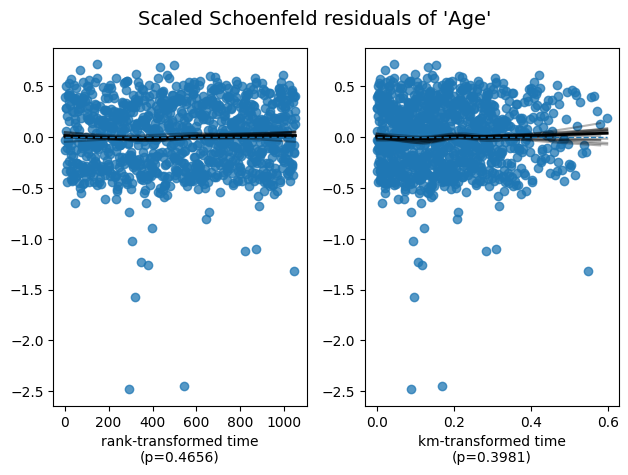

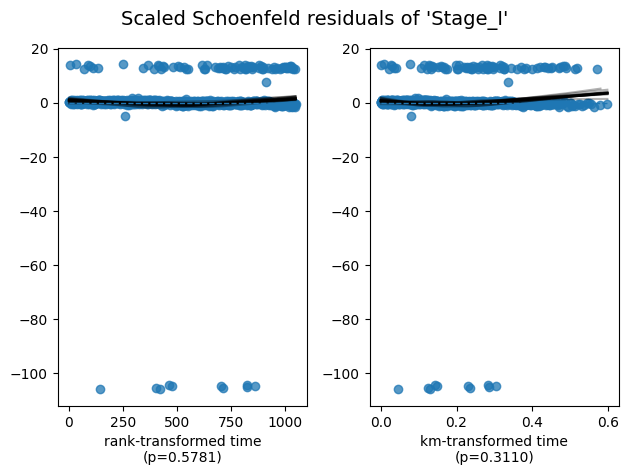

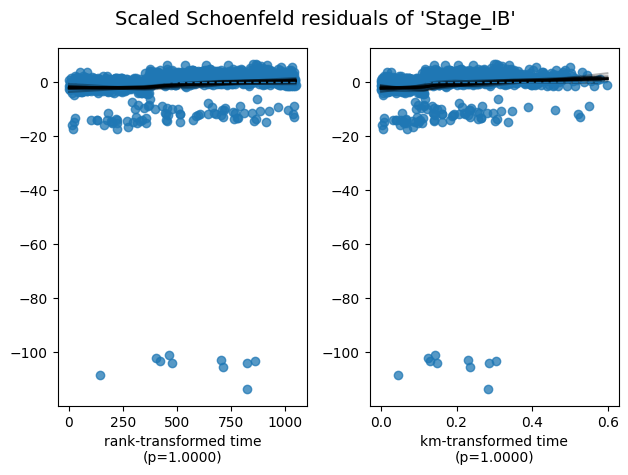

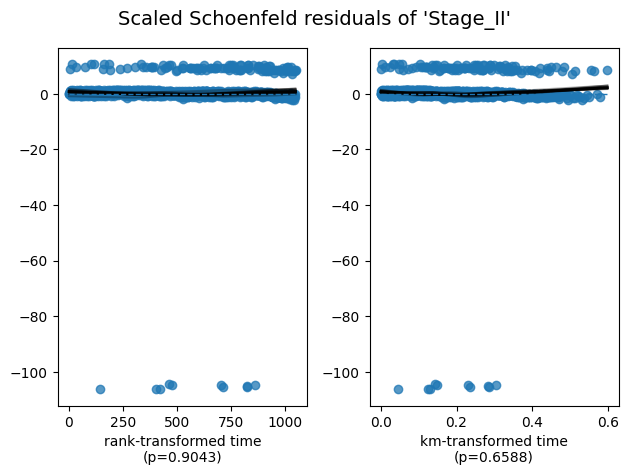

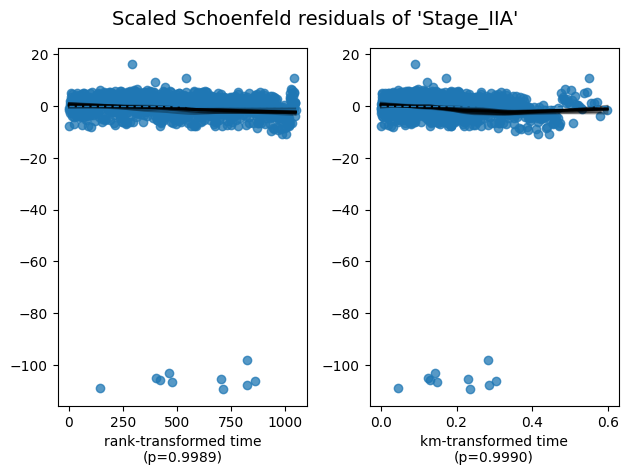

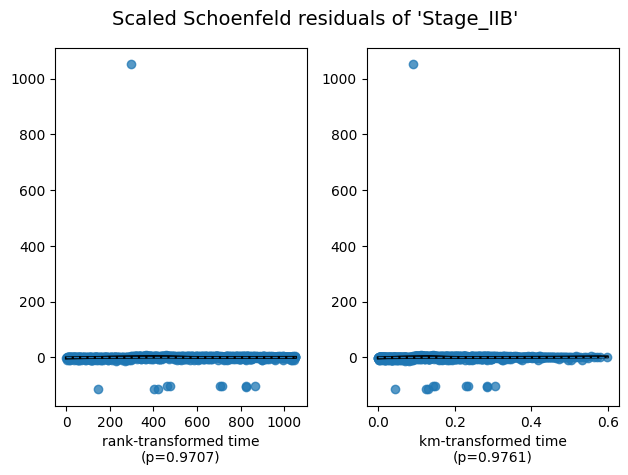

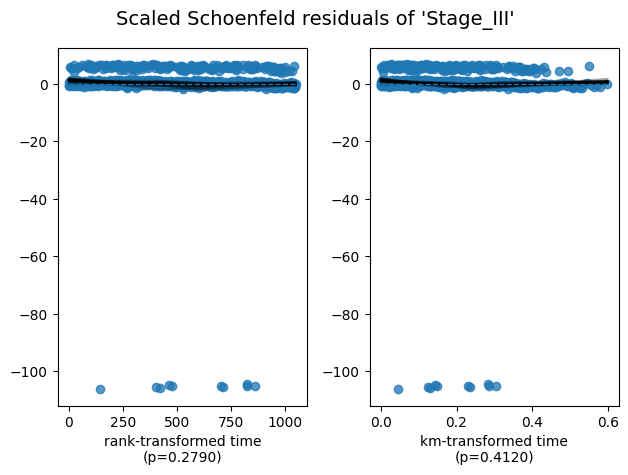

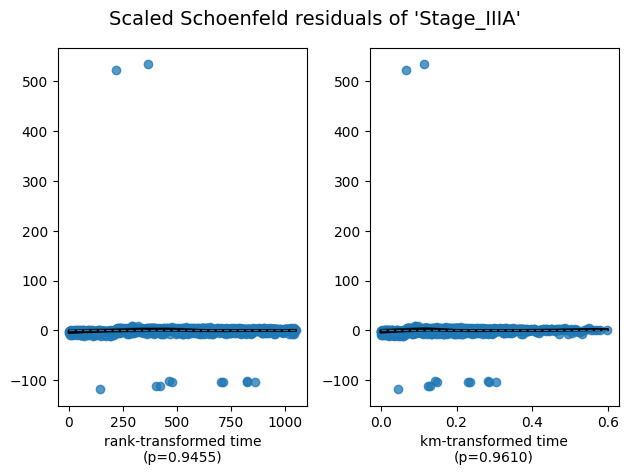

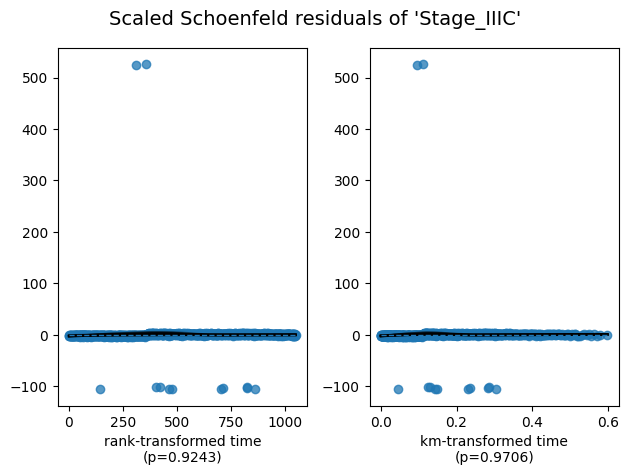

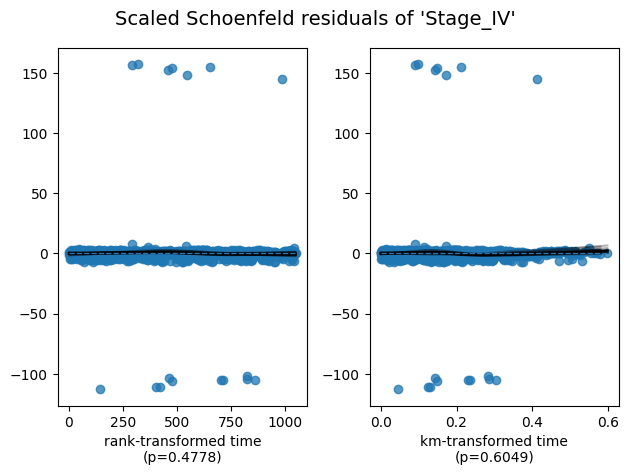

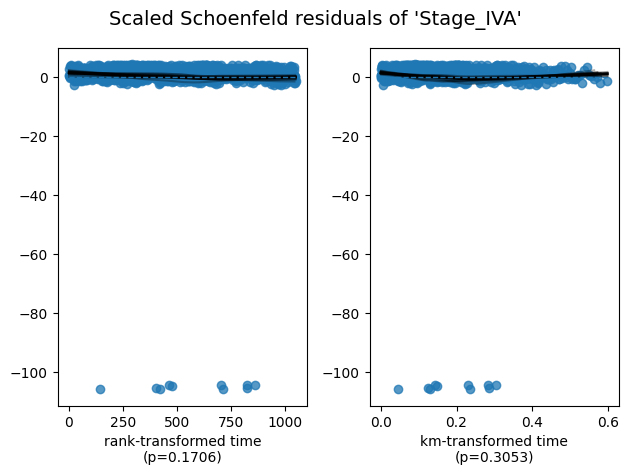

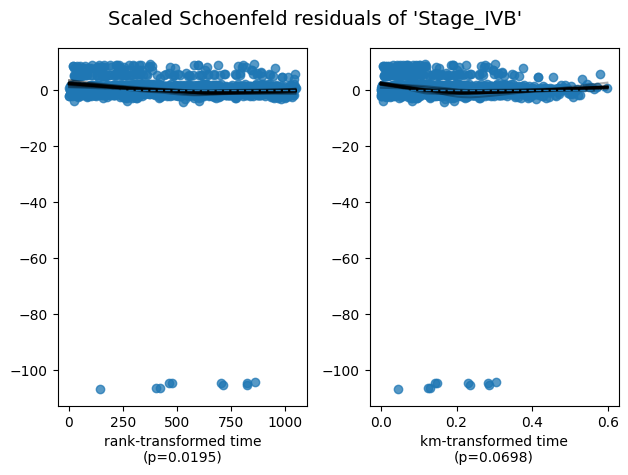

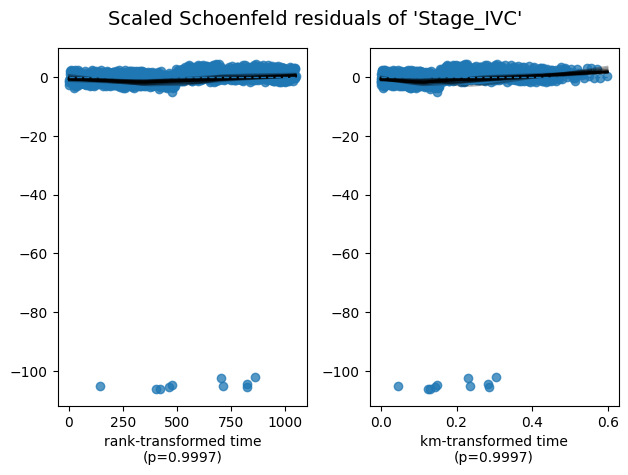

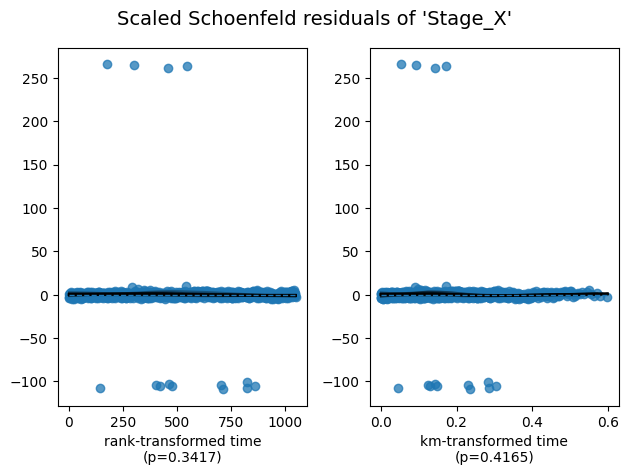

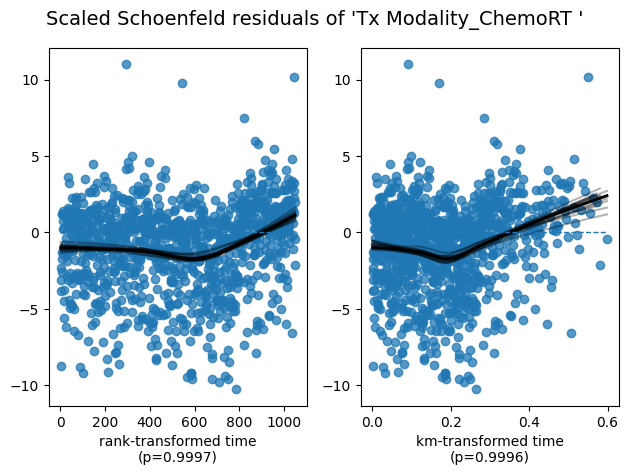

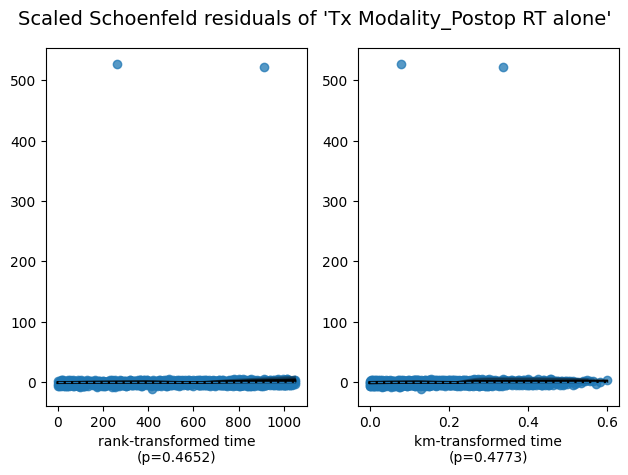

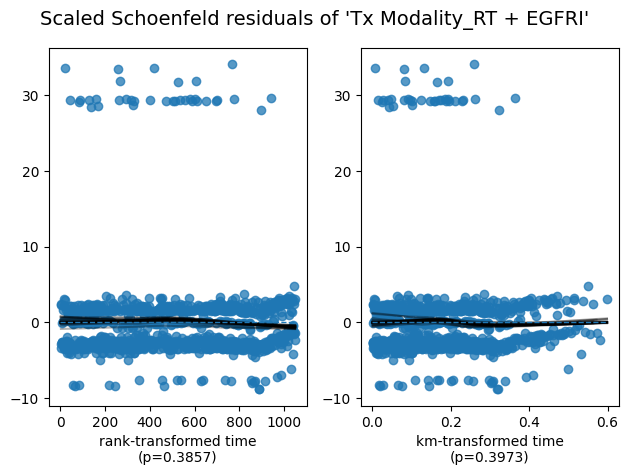

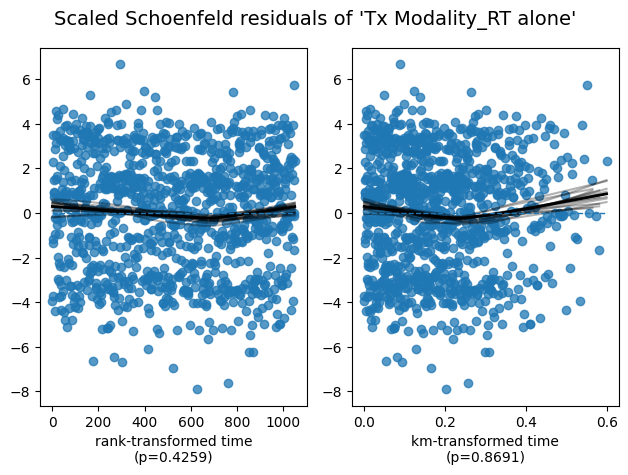

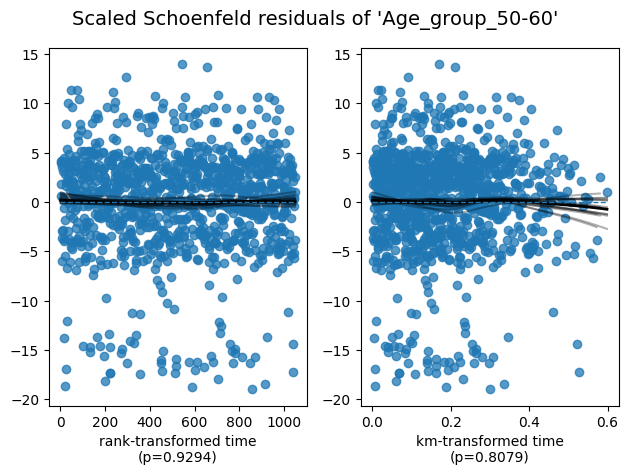

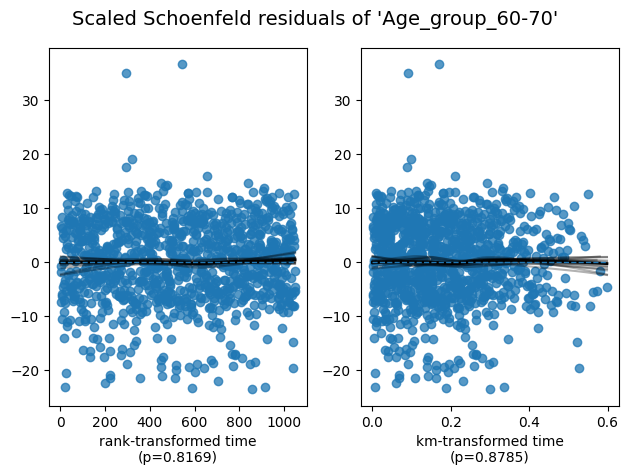

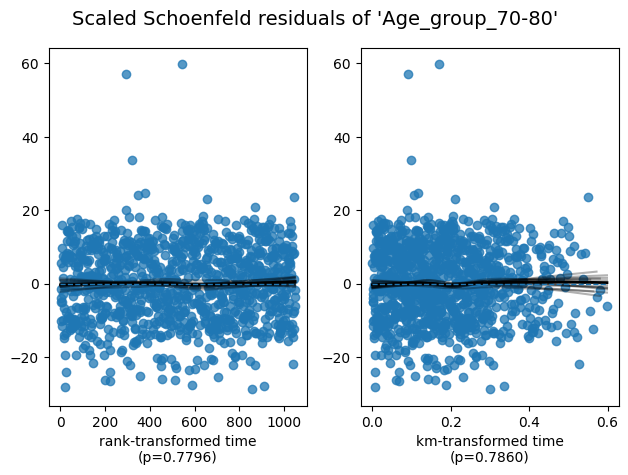

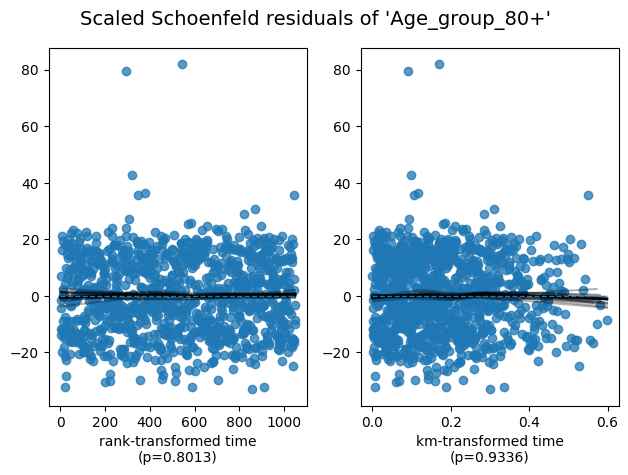

In [42]:
# Step 1: Select relevant columns and drop missing values
df_cox = data[['Length FU', 'event', 'Age', 'Stage', 'Tx Modality']].dropna()

# Step 2: Bin Age into groups to address PH assumption violation
df_cox['Age_group'] = pd.cut(
    df_cox['Age'],
    bins=[0, 50, 60, 70, 80, 100],  # You can adjust these ranges if needed
    labels=['<50', '50-60', '60-70', '70-80', '80+'],
    right=False
)

# Step 3: One-hot encode categorical variables (Stage, Tx Modality, and now Age_group)
df_cox = pd.get_dummies(df_cox, columns=['Stage', 'Tx Modality', 'Age_group'], drop_first=True)

# Step 4: Fit Cox PH model without stratification
from lifelines import CoxPHFitter
cph = CoxPHFitter()
cph.fit(df_cox, duration_col='Length FU', event_col='event')

# Step 5: Print model summary
cph.print_summary()

# Step 6: Check proportional hazards assumption again
cph.check_assumptions(df_cox, p_value_threshold=0.05, show_plots=True)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sksurv.ensemble import RandomSurvivalForest
from sksurv.preprocessing import OneHotEncoder
from sksurv.metrics import concordance_index_censored

# Prepare the data
# Assume df_cox already contains 'Length FU' (time) and 'event' (status)

# Feature matrix (excluding the event and time columns)
data_x = df_cox.drop(columns=['event', 'Length FU'])

# Target vector (structured array with event and duration)
data_y = np.array([(event, time) for event, time in zip(df_cox['event'], df_cox['Length FU'])],
                  dtype=[('event', bool), ('duration', float)])

# Train the Random Survival Forest model
rsf = RandomSurvivalForest(n_estimators=100, random_state=42)
rsf.fit(data_x, data_y)

# Perform variable importance analysis for the RSF model
result = permutation_importance(rsf, data_x, data_y, n_repeats=15, random_state=42)
feature_importance = pd.DataFrame(
    {
        k: result[k] for k in ("importances_mean", "importances_std")
    },
    index=data_x.columns
).sort_values(by="importances_mean", ascending=False)

# Plot feature importances for the RSF model
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Survival Forest)')
plt.barh(feature_importance.index, feature_importance['importances_mean'], xerr=feature_importance['importances_std'], align='center')
plt.xlabel('Mean Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Calculate the Concordance Index (C-index) for the Cox PH model
c_index_cox = concordance_index_censored(df_cox['event'], df_cox['Length FU'], cph.predict(df_cox))
print(f"Cox PH model C-index: {c_index_cox[0]}")

# Calculate the C-index for the Random Survival Forest model
c_index_rsf = concordance_index_censored(data_y['event'], data_y['duration'], rsf.predict(data_x))
print(f"Random Survival Forest C-index: {c_index_rsf[0]}")

